<a href="https://colab.research.google.com/github/palaciosalondra584-dev/Inteligencia_Artificial/blob/main/CNN/Clasificaci%C3%B3n_de_ropa26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Importamos numpy, tensorflow,seaborn y matplotlib, preparamos todo lo que necesitaremos para construir, entrenar y analizar un modelo

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

####Hacemos a fashion_mnist en una variable de entrada al dataset de ropa para entrenar y evaluar el modelo

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

####Utilizamos load_data es la función que trae las imágenes y etiquetas listas para usar

In [3]:
fashion_mnist.load_data

<function keras.src.datasets.fashion_mnist.load_data()>

####Creamos una lista que te permite mostrar nombres legibles en lugar de solo números cuando analices o visualices las predicciones

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

####Cargamos el dataset Fashion MNIST y lo dividimos en entrenamiento y prueba para entrenar y evaluar tu modelo

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


####Definimos una variable index con un valor de 10 que indica el conjunto que vas a usar

In [6]:
index = 10

####Image:guardamos la imagen número 10 del conjunto de entrenamiento.

####label:Que  guarda la etiqueta (clase) correspondiente a esa imagen, un número entre 0 y 9.

In [7]:
image = train_images[index]
label = train_labels[index]

####Imprimimos el resultado será una matriz de 28*28, porque las imágenes de Fashion MNIST son de 28*28 píxeles, formando la imagen de la ropa  

In [8]:
print(image)

[[  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0
   85 185 112   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217
  231 205 217 188  34   0   0   0   0   0]
 [  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191
  168 190 172 188 175   0   0   0   0   0]
 [  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174
  195 185 174 161 175  59   0   0   0   0]
 [  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184
  185 172 171 164 174 120   0   0   0   0]
 [  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191
  193 190 181 171 172 158   0   0   0   0]
 [  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191
  194 188 180 161 161 185   0   0   0   0]
 [  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172
  170 164 139 149 162 166  21   0   0   0]
 [  0   0   0   0  79 145 160 214 123 128 153 160 164 158 157 15

####Mostramos el tamaño del grafico en escala de grises imprimiendo la prenda y su nombre

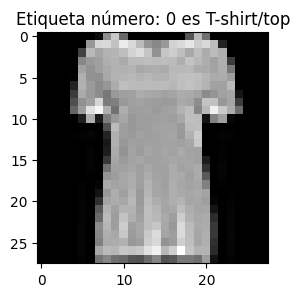

In [9]:
plt.figure(figsize=(3, 3))
plt.imshow(image, cmap=plt.cm.gray)
plt.title(f'Etiqueta número: {label} es {class_names[label]}')
plt.show()

####Mostramos las dimensiones de las imagenes, es decir cuantas imgenes tienes y de que tamaño son el conjunto

In [10]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


####preparamos las imágenes para que la red neuronal las entienda correctamente

In [11]:
# Normalizar las imágenes para que los valores estén en el rango [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

####En palabras simples: esta CNN aprende de las imágenes de ropa paso a paso, desde bordes simples hasta patrones complejos, y finalmente decide qué tipo de prenda es.

In [12]:
# Crear el modelo de CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


####Configuramos el optimizador Adam definiendo el peso con la tasa de aprendizaje para mejorar sus predicciones

In [13]:
# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

####Definimos los pesos del entrenamiento y que tan lejos estan las predicciones de los adtos reales mostrando la excatitud del modelo

In [14]:
model.compile(optimizer=adam_optimizer,
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

####Colocamos los datos de entrenamiento colocando 10 epocas y verificamos que tan bien lo hace el modelo durante el entrenamiento

In [15]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.7459 - loss: 0.7005 - val_accuracy: 0.8539 - val_loss: 0.4072
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.8783 - loss: 0.3325 - val_accuracy: 0.8788 - val_loss: 0.3259
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.8951 - loss: 0.2826 - val_accuracy: 0.8917 - val_loss: 0.2967
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9088 - loss: 0.2456 - val_accuracy: 0.8977 - val_loss: 0.2869
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9170 - loss: 0.2204 - val_accuracy: 0.8971 - val_loss: 0.2792
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9243 - loss: 0.1974 - val_accuracy: 0.8974 - val_loss: 0.2812
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9319 - loss: 0.1809 - val_accuracy: 0.8988 - val_loss: 0.2767
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.9399 -

####Evaluamos el rendimiento colocando el  error promedio y la exactitud, imprimiendo los modelos de forma resumida

In [16]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 3s - 8ms/step - accuracy: 0.9012 - loss: 0.2948


####En palabras simples: tenemos el número que la red cree que corresponde a cada imagen de prueba.

In [17]:
probability_model = Sequential([model, Softmax()])
predictions = probability_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


####Esto permite ver de un vistazo qué tipos de ropa confunde más el modelo

In [18]:
# Calcular matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

####Graficamos la matriz de confusion para poder ver si el modelo lo predice bien o cuales esta confundiendo

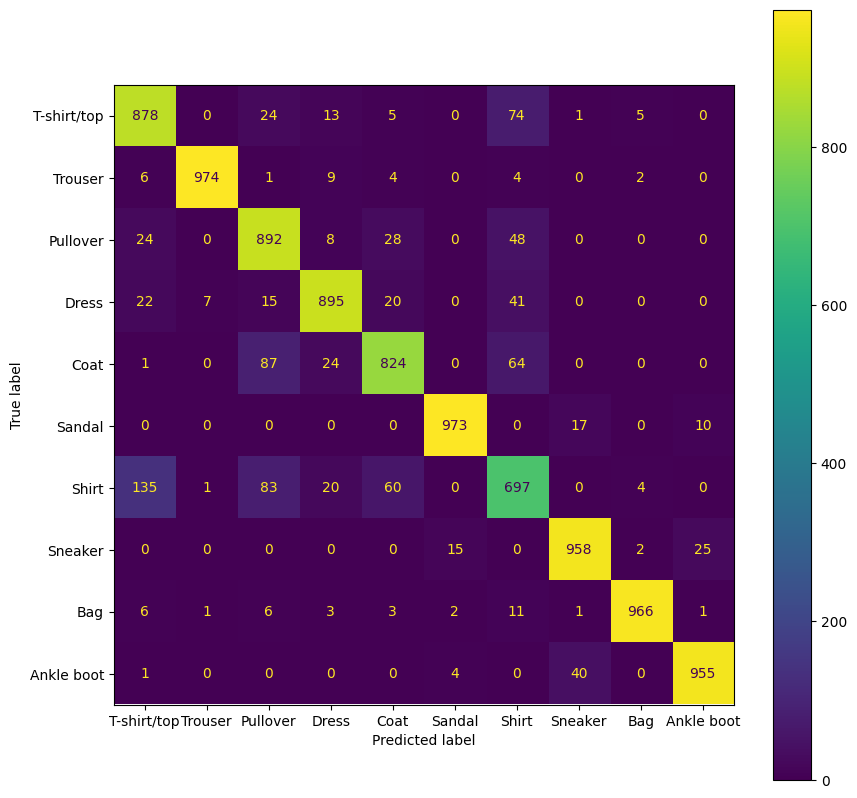

In [19]:
# Graficar matriz de confusión
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.show()

####Visualizamos como es que se estan prediciendo algunas iamgenes de prueba indicando los aciertos y los errores que los buenos son en azul y los malos o incorrectos en rojo

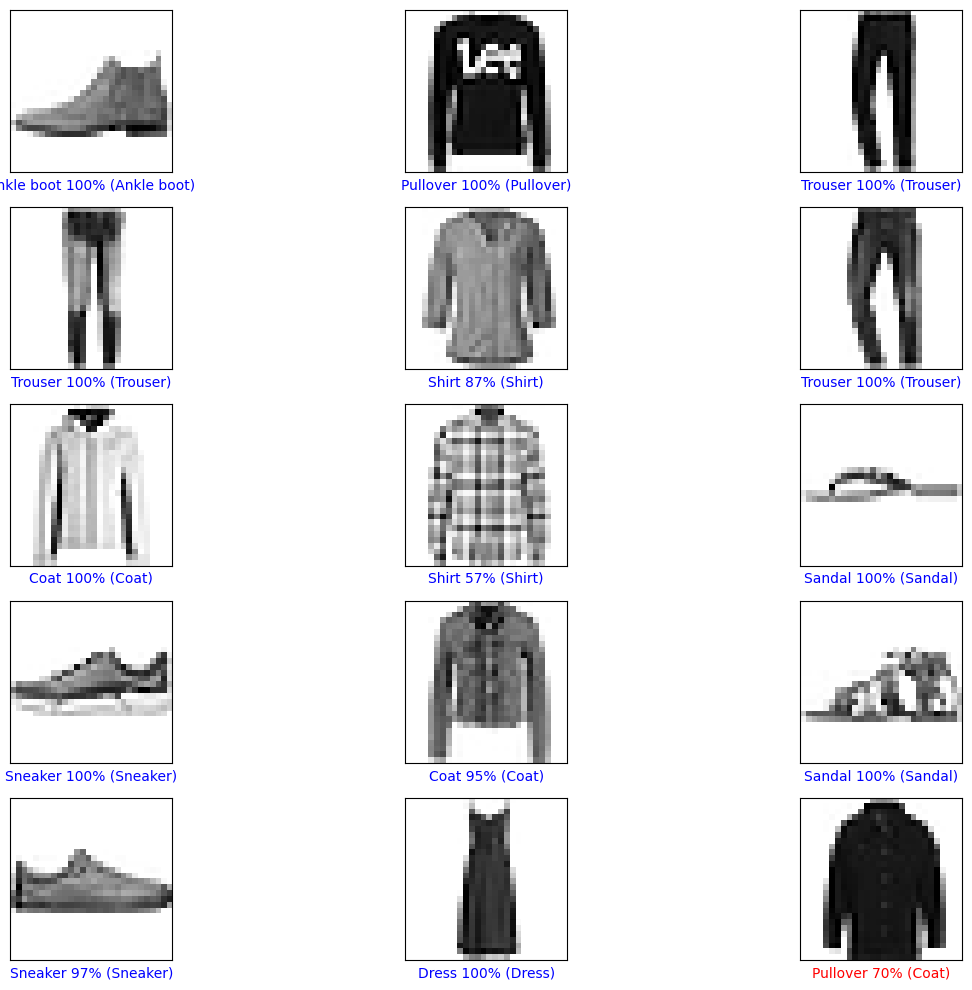

In [20]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape((28, 28)), cmap=plt.cm.binary)

    predicted_label = tf.argmax(predictions_array).numpy()
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*tf.reduce_max(predictions_array).numpy(),
                                         class_names[true_label]),
                                         color=color)

# Graficar algunas predicciones
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)

plt.tight_layout()
plt.show()